In [0]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist as dataset
from keras.utils import to_categorical
%matplotlib inline

Using TensorFlow backend.


In [0]:
(train_images, train_labels), (test_images, test_labels) = dataset.load_data() # train 이미지 불러오기, test set과 이미 나눠놓았음

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
type(train_images)

numpy.ndarray

In [0]:
train_images.shape # data의 이미지가 6만개가 붙어 있음.

(60000, 28, 28)

In [0]:
train_labels[0]

5

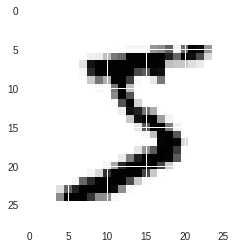

In [0]:
plt.imshow(train_images[0])
plt.show()

# settings hyperparameter

In [0]:
num_class = 10
learning_rate = 0.001
batch_size = 64
num_epochs = 1 # 보통 몇 백에서 몇 십 단위로 한다.

input_shape = (28, 28, 1)

In [0]:
input_net = tf.keras.Input(shape = input_shape)
net = tf.keras.layers.Conv2D(32, (3, 3))(input_net)
net = tf.keras.layers.ReLU()(net)
net = tf.keras.layers.Conv2D(64, (3, 3))(net)
net = tf.keras.layers.ReLU()(net)
net = tf.keras.layers.MaxPool2D((2, 2))(net)
net = tf.keras.layers.Dropout(0, 25)(net)
net = tf.keras.layers.Flatten()(net)
net = tf.keras.layers.Dense(128, activation = 'relu')(net)
net = tf.keras.layers.Dropout(0, 5)(net)
net = tf.keras.layers.Dense(num_class,  activation = 'softmax')(net)

model = tf.keras.Model(inputs = input_net, outputs = net)

In [0]:
model.compile(optimizer = tf.train.AdamOptimizer(learning_rate),
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
re_lu (ReLU)                 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
__________

In [0]:
train_images.shape

np.expand_dims(train_images, - 1).shape

(60000, 28, 28, 1)

In [0]:
to_categorical(train_labels[0])
to_categorical(train_labels, num_class)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [0]:
model.fit(x = np.expand_dims(train_images, - 1),
          y=to_categorical(train_labels, num_class),
         epochs = num_epochs,
         batch_size = batch_size)

Epoch 1/1
60000/60000 [==============================] - 13s 213us/step - loss: 10.3953 - acc: 0.3542
